In [1]:
import pandas as pd
import numpy as np
import torch


In [0]:
# check CUDA
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device('cuda:0')
    from torch.cuda import FloatTensor
else:
    device = torch.device('cpu')
    from torch import FloatTensor
    
# check Colab
try:
    from google.colab import drive
    is_in_colab = True
except:
    is_in_colab = False

In [3]:
# вывод информации о выданном с colab GPU
if is_in_colab:
    !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
    !pip install gputil
    !pip install psutil
    !pip install humanize
    import psutil
    import humanize
    import os
    import GPUtil as GPU
    GPUs = GPU.getGPUs()
    gpu = GPUs[0]
    def printm():
        process = psutil.Process(os.getpid())
        print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
        print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

    printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=8be3ddab3b5f51be40bc9e4119a853ba47abc065c78fdc04a771e7c8cb5fd528
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.7 GB  | Proc size: 272.1 MB
GPU RAM Free: 11430MB | Used: 11MB | Util   0% | Total 11441MB


In [4]:
if is_in_colab:
    drive.mount('/gdrive')
    %cd '/gdrive/My Drive/Colab/kaggle_salt'
    !ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/Colab/kaggle_salt
'catalyst baseline.ipynb'		 models.py	       train.py
'catalyst segmentation_tutorial.ipynb'	 __pycache__	       utils.py
 data					 salt_baseline.ipynb
 dataset.py				 sandbox.ipynb


In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
from dataset import *

In [0]:
train_dataset, valid_dataset, show_dataset = generate_datesets()

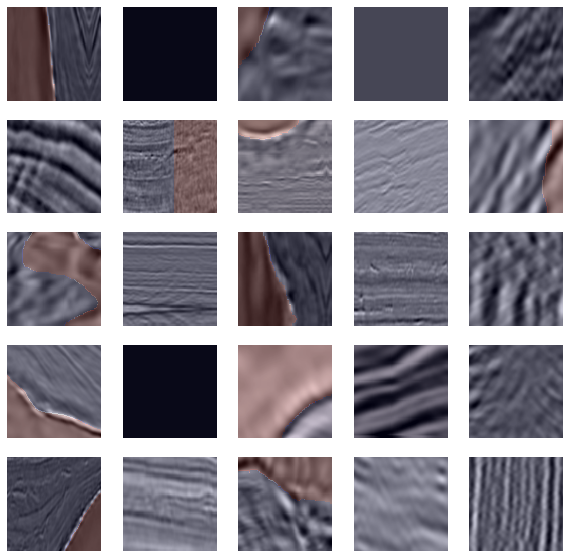

In [8]:
show_dataset.show_samples(5,5, random=False)

In [9]:
print(len(train_dataset))
sample = train_dataset[0][0]
print(type(sample))
print(sample.shape)

3000
<class 'torch.Tensor'>
torch.Size([3, 96, 96])


In [0]:
import torchvision.models as t_models
from torchvision import transforms

In [0]:
import models
import utils
import train

In [0]:
model = models.unet11()
model.to(device)
loss_fn = torch.nn.BCELoss()

In [0]:
lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [0]:
%%time
train.train(model, loss_fn, optimizer, device, epoch=5, lr=lr)

  0%|          | 0/750 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
 47%|████▋     | 349/750 [29:59<36:39,  5.49s/it]

In [0]:
threshold = 0.5

image, gt_mask = train_dataset[9]
# pr_mask = model(image.unsqueeze(0))
pr_mask = train.predict(model, device, image.unsqueeze(0))
pr_mask = pr_mask.detach().cpu()[0]

image = utils.tensor_to_image(image)
gt_mask = gt_mask.squeeze(0)
pr_mask = pr_mask.squeeze(0)



In [0]:
plt.imshow(gt_mask);

In [0]:
plt.imshow(pr_mask);

In [0]:
pr_mask = (pr_mask > threshold).type(torch.float)
compare_masks(image, gt_mask, pr_mask)